In [1]:
! pip install statsmodels --upgrade

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [38]:
!pip install pmdarima 

  Using cached pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)


In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

# Analise de series temporais 

In [81]:
n = 100
X = np.linspace(0, 2*np.pi, n)
fs = 1/(X[1]-X[0])
f = fs/20

In [82]:
def generate_series(x, freq, opt='linear_trend+seasonal'):
    if opt == 'linear_trend':
        fx = x 
    elif opt == 'linear_trend+seasonal':
        fx = x + np.sin(2*np.pi*freq*x)
    elif opt == 'seasonal':
        fx = np.sin(2*np.pi*freq*x)
    else:
        raise ValueError("Unkown opt parameter.")
        
    return fx

In [83]:
def plot_decompostion(decomposition):
    fig, ax = plt.subplots(figsize=(6,6),nrows=4)
    
    ax[0].plot(decomposition.observed)
    ax[0].set_title("Series")
    
    ax[1].plot(decomposition.trend)
    ax[1].set_title("Trend")
    
    ax[2].plot(decomposition.seasonal)
    ax[2].set_title("Seasonal")
    
    ax[3].plot(decomposition.resid)
    ax[3].set_title("Residue")
    
    plt.tight_layout()
    plt.show()

In [84]:
n_points_in_period = int(fs/f)
print(f"Numero de pontos por período:{n_points_in_period}")

Numero de pontos por período:20


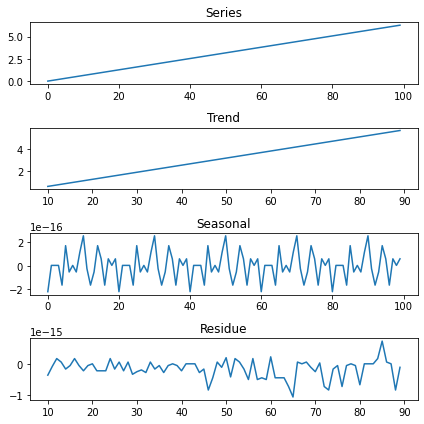

In [85]:
series = generate_series(X, f, opt='linear_trend')
decomposition = seasonal_decompose(series, model='additive', 
                                  period= n_points_in_period)
plot_decompostion(decomposition)

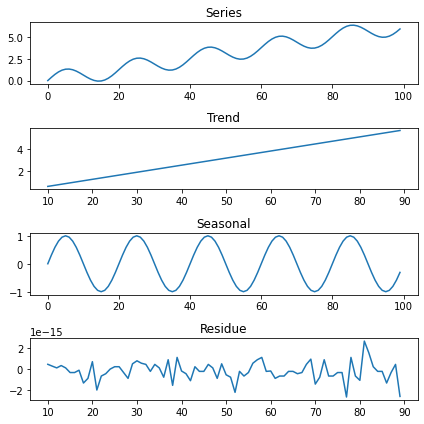

In [86]:
series = generate_series(X, f, opt='linear_trend+seasonal')
decomposition = seasonal_decompose(series, model='additive', 
                                  period= n_points_in_period)
plot_decompostion(decomposition)

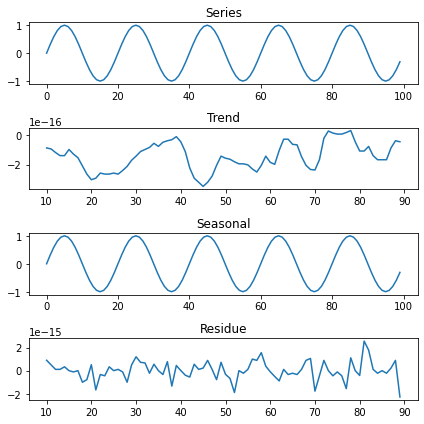

In [87]:
series = generate_series(X, f, opt='seasonal')
decomposition = seasonal_decompose(series, model='additive', 
                                  period= n_points_in_period)
plot_decompostion(decomposition)

# ACF E PACF 

In [88]:
df = pd.read_csv("https://pycourse.s3.amazonaws.com/monthly_air_passengers.csv", index_col="Month")
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


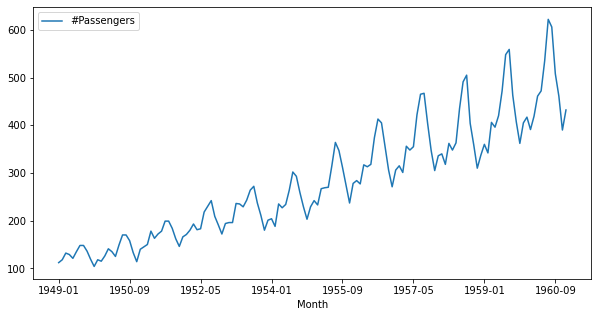

In [89]:
df.plot(figsize=(10,5));

# Decomposição

In [90]:
decomposition = seasonal_decompose(df.values, model='additive', period=12)

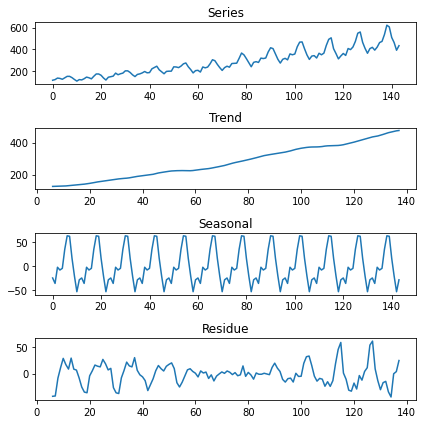

In [91]:
plot_decompostion(decomposition)

In [92]:
result = adfuller(df)
print(f'p-value:{result[1]}')

p-value:0.9918802434376411


In [93]:
df_diff = df.diff().dropna()

In [94]:
result = adfuller(df_diff.dropna())
print(f'p-value:{result[1]}')

p-value:0.0542132902838265


2023-03-21 16:02:36,223 [30940] WARNING  py.warnings:109: [JupyterRequire] C:\Users\rodol\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(



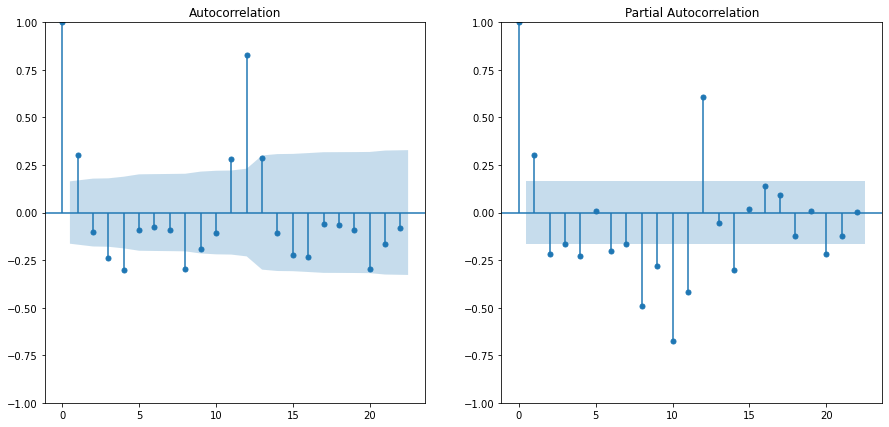

In [95]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
plot_acf(df_diff, ax=ax[0])
plot_pacf(df_diff, ax=ax[1])
plt.show()

In [96]:
n, p = len(df), 0.7
train = df[:int(n*p)]
test = df[int(n*p):]


In [97]:
model = pm.auto_arima(train,
                     seasonal = True, 
                     m=12, 
                     trace=True,
                     error_actionn='ignore',
                     suppress_warnings=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.761, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [98]:
forecast = model.predict(n_periods=len(test))

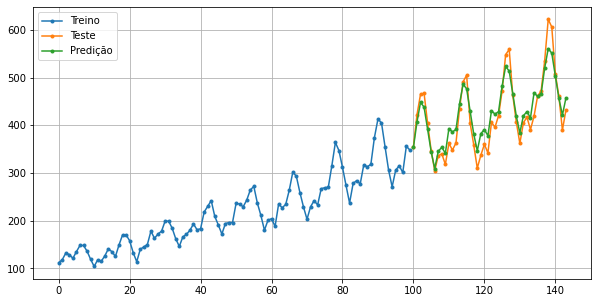

In [99]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(int(n*p)), train.values, '.-', label='Treino')
plt.plot(np.arange(int(n*p), n), test.values, '.-', label='Teste')
plt.plot(np.arange(int(n*p), n), forecast, '.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE do modelo no conjunto de teste:{rmse}')

RMSE do modelo no conjunto de teste:26.205870278041857


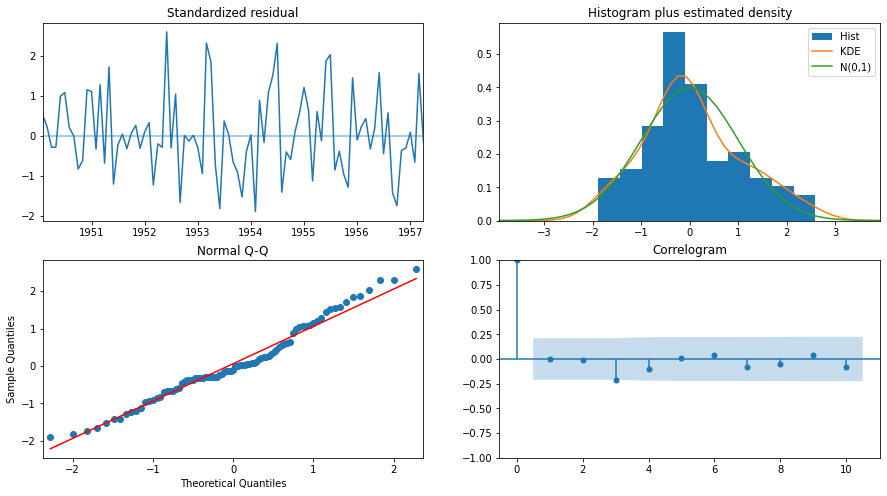

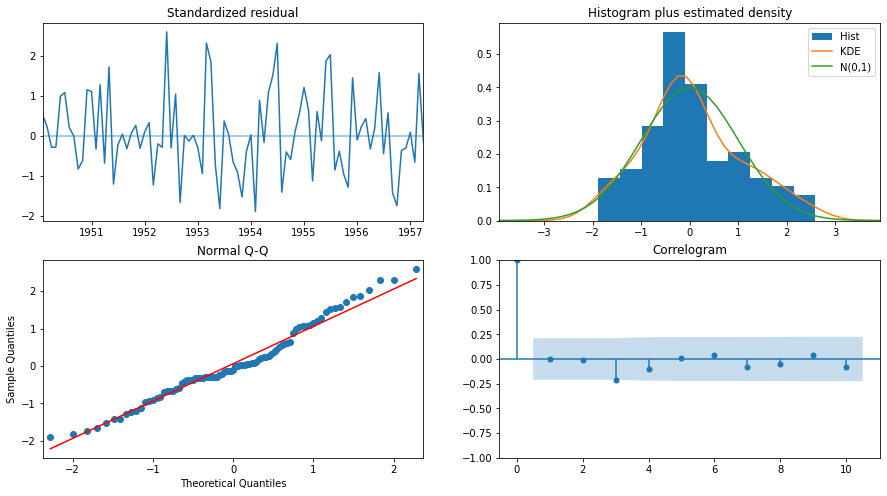

In [102]:
model.plot_diagnostics(figsize=(15,8))

In [130]:
# utilizando o keras: https://keras.io/
import keras
from sklearn.preprocessing import MinMaxScaler

In [131]:
# extraindo a série (np.array)
series = df.values 

In [132]:
# normalização (max 1 e min 0)
scaler = MinMaxScaler()
series = scaler.fit_transform(series)

In [133]:
# divisão em treino e teste
n, p = len(df), 0.7
train = series[:int(n*p)]
test = series[int(n*p):]

In [134]:
# convertendo a série para uma estrutura x_train, y_train
x_train, y_train = train[:-1], train[1:]
x_test, y_test = test[:-1], test[1:]

In [135]:
# x_train, y_train: primeiras 5 linhas
print(np.c_[x_train, y_train][:5, :])

[[0.01544402 0.02702703]
 [0.02702703 0.05405405]
 [0.05405405 0.04826255]
 [0.04826255 0.03281853]
 [0.03281853 0.05984556]]


In [136]:
# construindo modelo
inputs = keras.layers.Input(shape=(1, 1))
lstm_out = keras.layers.LSTM(4)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_8 (LSTM)               (None, 4)                 96        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [137]:
# fit no modelo
model.fit(x=x_train, y=y_train, batch_size=1, epochs=25)

Epoch 1/25
99/99 [==============================] - 2s 2ms/step - loss: 0.0572
Epoch 2/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 3/25
99/99 [==============================] - 0s 997us/step - loss: 0.0212
Epoch 4/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 5/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 6/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 7/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 8/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 9/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 10/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 11/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 12/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 13/25
99/99 [============================

In [138]:
# previsão
forecast = model.predict(x_test)

2023-03-21 16:29:09,511 [30940] WARNING  tensorflow:148: [JupyterRequire] 5 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001DA515B7D30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 2ms/step


In [139]:
# valores na escala original
forecast_orig = scaler.inverse_transform(forecast)
y_train_orig = scaler.inverse_transform(y_train)
y_test_orig = scaler.inverse_transform(y_test)

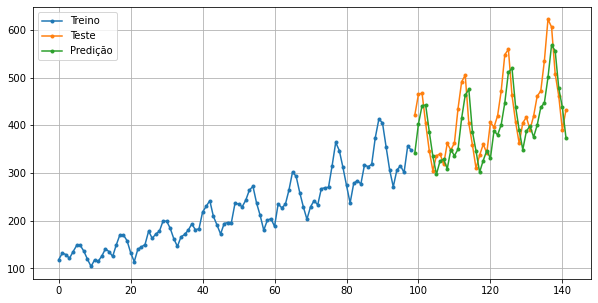

In [140]:
# plot da predição
n_train, n_test = len(y_train), len(y_test)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_train), y_train_orig,'.-', label='Treino')
plt.plot(np.arange(n_train, n_train+n_test), y_test_orig,'.-', label='Teste')
plt.plot(np.arange(n_train, n_train+n_test), forecast_orig,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [142]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig,forecast_orig))
print(f"RMSE do modelo no conjunto de teste: {rmse}")

RMSE do modelo no conjunto de teste: 52.31969013783621


In [151]:
# adição da sazonalidade como variável exógena
# [s_{t-12}, s_{t-1}] ~ s_t
sz = 12
x_train, y_train = np.c_[train[:-sz], train[sz-1:-1]], train[sz:]
x_test, y_test = np.c_[test[:-sz], test[sz-1:-1]], test

In [152]:
# contabilização do primeiro ciclo de teste na predição
x_test = np.r_[np.c_[train[-sz:],
                     np.r_[train[-1], test[:sz-1].ravel()]], x_test]

In [154]:
# construindo modelo
inputs = keras.layers.Input(shape=(2, 1))
lstm_out = keras.layers.LSTM(4)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 2, 1)]            0         
                                                                 
 lstm_11 (LSTM)              (None, 4)                 96        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [156]:
# previsão
forecast = model.predict(x_test)

2/2 [==============================] - 0s 16ms/step


In [157]:
# valores na escala original
forecast_orig = scaler.inverse_transform(forecast)
y_train_orig = scaler.inverse_transform(y_train)
y_test_orig = scaler.inverse_transform(y_test)

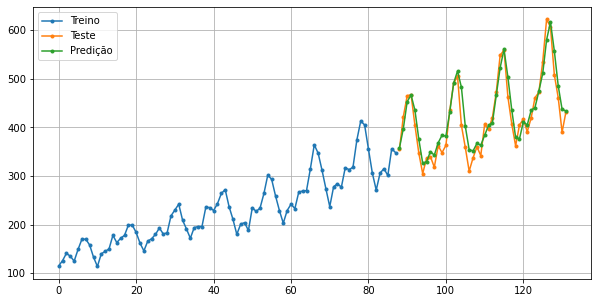

In [158]:
# plot da predição
n_train, n_test = len(y_train), len(y_test)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_train), y_train_orig,'.-', label='Treino')
plt.plot(np.arange(n_train, n_train+n_test), y_test_orig,'.-', label='Teste')
plt.plot(np.arange(n_train, n_train+n_test), forecast_orig,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [159]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig,forecast_orig))
print(f"RMSE do modelo no conjunto de teste: {rmse}")

RMSE do modelo no conjunto de teste: 25.991705331104466
